In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go


import warnings
warnings.filterwarnings('ignore')

### Peek into the Data

In [2]:
df = pd.read_csv("Q2_data_set - Q2_data_set.csv")

In [3]:
print('Shape:', df.shape, end='\n\n')
print('Null Values:', df.isnull().sum(), sep='\n')

Shape: (20000, 12)

Null Values:
CORPORATE_IDENTIFICATION_NUMBER      0
COMPANY_NAME                         0
COMPANY_STATUS                       0
COMPANY_CLASS                        0
COMPANY_CATEGORY                     0
AUTHORIZED_CAPITAL                   0
PAIDUP_CAPITAL                     154
DATE_OF_REGISTRATION                51
REGISTRAR_OF_COMPANIES               0
PRINCIPAL_BUSINESS_ACTIVITY        215
REGISTERED_OFFICE_ADDRESS            1
SUB_CATEGORY                         2
dtype: int64


In [4]:
df.dropna(inplace=True)

In [5]:
df.head()

,CORPORATE_IDENTIFICATION_NUMBER,COMPANY_NAME,COMPANY_STATUS,COMPANY_CLASS,COMPANY_CATEGORY,AUTHORIZED_CAPITAL,PAIDUP_CAPITAL,DATE_OF_REGISTRATION,REGISTRAR_OF_COMPANIES,PRINCIPAL_BUSINESS_ACTIVITY,REGISTERED_OFFICE_ADDRESS,SUB_CATEGORY
0,U55101AN2007PTC000082,GOLDEN REST ROOM PRIVATE LIMITED,ACTIVE,Private,Company Limited by Shares,1000000,100000,26-03-2007,RoC-Chennai,Trading,Golden Rest room Prem Nagar Port Blair Andaman...,Indian Non-Government Company
1,U01111AN2007PTC000087,ANDAMAN AGRO PRIVATE LIMITED,ACTIVE,Private,Company Limited by Shares,2000000,100000,08/06/07 0:00,RoC-Chennai,Agriculture and Allied Activities,Sadha Bhavan Gurudwara Lane Port Blair Andaman...,Indian Non-Government Company
2,U45201AN2007PTC000086,ANDAMAN NIRMAN PRIVATE LIMITED,ACTIVE,Private,Company Limited by Shares,2000000,2000000,07/11/07 0:00,RoC-Chennai,Construction,Junglighat Port Blair Andaman and Nicobar Isla...,Indian Non-Government Company
3,U62200AN2007PTC000227,ABLE AVIATION (INDIA) PRIVATE LIMITED,ACTIVE,Private,Company Limited by Shares,20000000,10000000,20-09-2007,RoC-Chennai,"Transport, storage and Communications","HOUSE NO.M.B-210, PART-II, NEAR INCOME TAX OFF...",Indian Non-Government Company
4,U52190AN1996PTC000053,IMPERIAL AGENCIES PRIVATE LIMITED,ACTIVE,Private,Company Limited by Shares,2500000,2500000,07/10/96 0:00,RoC-Chennai,Trading,2 Middle Point Port Blair Andaman and Nicobar ...,Indian Non-Government Company


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19628 entries, 0 to 19999
Data columns (total 12 columns):
CORPORATE_IDENTIFICATION_NUMBER    19628 non-null object
COMPANY_NAME                       19628 non-null object
COMPANY_STATUS                     19628 non-null object
COMPANY_CLASS                      19628 non-null object
COMPANY_CATEGORY                   19628 non-null object
AUTHORIZED_CAPITAL                 19628 non-null object
PAIDUP_CAPITAL                     19628 non-null object
DATE_OF_REGISTRATION               19628 non-null object
REGISTRAR_OF_COMPANIES             19628 non-null object
PRINCIPAL_BUSINESS_ACTIVITY        19628 non-null object
REGISTERED_OFFICE_ADDRESS          19628 non-null object
SUB_CATEGORY                       19628 non-null object
dtypes: object(12)
memory usage: 1.0+ MB


In [7]:
for col in df.columns:
    print(col, df[col].nunique())

CORPORATE_IDENTIFICATION_NUMBER 19628
COMPANY_NAME 19625
COMPANY_STATUS 8
COMPANY_CLASS 3
COMPANY_CATEGORY 3
AUTHORIZED_CAPITAL 552
PAIDUP_CAPITAL 3412
DATE_OF_REGISTRATION 6836
REGISTRAR_OF_COMPANIES 2
PRINCIPAL_BUSINESS_ACTIVITY 19
REGISTERED_OFFICE_ADDRESS 18622
SUB_CATEGORY 7


#### Focusing on meaningful data.

In [8]:
## all_sectors = set(df['PRINCIPAL_BUSINESS_ACTIVITY'].tolist())
imp = df[['COMPANY_NAME', 'PRINCIPAL_BUSINESS_ACTIVITY']]
imp.columns = ['Company', 'Sector']

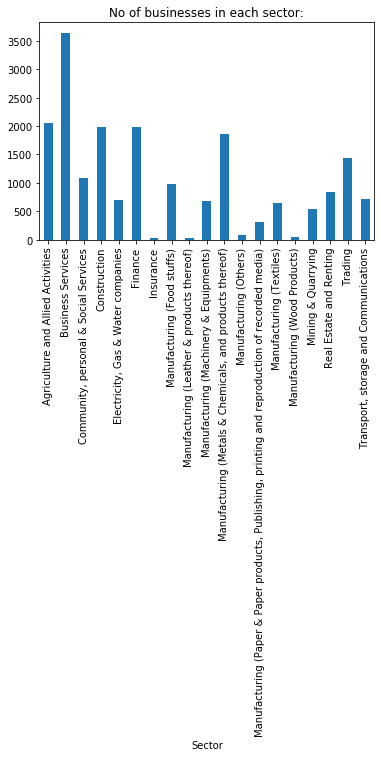

In [9]:
imp.groupby(by='Sector')['Company'].count().plot(kind='bar')
plt.title("No of businesses in each sector:")
plt.show()

### Data Cleaning

In [10]:
df.loc[:, 'COMPANY_NAME'] = df['COMPANY_NAME'].apply(lambda x : x.lower())

In [11]:
from nltk.tokenize import word_tokenize
imp.loc[:, 'Company']= imp['Company'].apply(word_tokenize)

In [12]:
from nltk.corpus import stopwords 

StopWords = set(stopwords.words('english'))
### AFter seeing most frequent words
mannual_stopwords = (['private', 'limited', 'pvt', 'ltd', 'india', 'sri', 'services', 'service', 'sai'])  
StopWords.update(mannual_stopwords)

def clean_words(x):
    words = []
    for i in x:
        if i.isalnum() and i not in StopWords:
            words.append(i)
    return words

imp.loc[:,'Company'] = imp['Company'].apply(clean_words)

In [13]:
import nltk
most_common = dict()

for group, data in imp.groupby(by='Sector'):
    words = []
    for i in data['Company'].tolist():
        words.extend(i)
    words = nltk.FreqDist(words)
    words = words.most_common(10)
    most_common['{}'.format(group)] = words
pd.DataFrame(most_common)

,Agriculture and Allied Activities,Business Services,"Community, personal & Social Services",Construction,"Electricity, Gas & Water companies",Finance,Insurance,Manufacturing (Food stuffs),Manufacturing (Leather & products thereof),Manufacturing (Machinery & Equipments),"Manufacturing (Metals & Chemicals, and products thereof)",Manufacturing (Others),"Manufacturing (Paper & Paper products, Publishing, printing and reproduction of recorded media)",Manufacturing (Textiles),Manufacturing (Wood Products),Mining & Quarrying,Real Estate and Renting,Trading,"Transport, storage and Communications"
0,"(LIMITED, 1680)","(LIMITED, 3462)","(LIMITED, 966)","(LIMITED, 1888)","(LIMITED, 677)","(LIMITED, 1603)","(LIMITED, 24)","(LIMITED, 757)","(LIMITED, 22)","(LIMITED, 532)","(LIMITED, 1450)","(LIMITED, 78)","(LIMITED, 264)","(LIMITED, 529)","(LIMITED, 43)","(LIMITED, 470)","(LIMITED, 789)","(LIMITED, 1261)","(LIMITED, 647)"
1,"(PRIVATE, 1531)","(PRIVATE, 3347)","(PRIVATE, 920)","(PRIVATE, 1793)","(PRIVATE, 621)","(PRIVATE, 1393)","(PRIVATE, 21)","(PRIVATE, 676)","(PRIVATE, 20)","(PRIVATE, 497)","(PRIVATE, 1286)","(PRIVATE, 74)","(PRIVATE, 241)","(PRIVATE, 454)","(PRIVATE, 42)","(PRIVATE, 451)","(PRIVATE, 760)","(PRIVATE, 1210)","(PRIVATE, 626)"
2,"(AGRO, 454)","(SOLUTIONS, 642)","(SERVICES, 137)","(CONSTRUCTIONS, 331)","(POWER, 320)","(CHIT, 706)","(INSURANCE, 11)","(LTD, 212)","(LTD, 9)","(LTD, 121)","(LTD, 382)","(JEWELLERS, 12)","(PAPER, 77)","(MILLS, 185)","(WOOD, 8)","(GRANITES, 131)","(ESTATES, 221)","(LTD, 161)","(COLD, 173)"
3,"(FARMS, 407)","(SERVICES, 460)","(HOSPITALS, 127)","(PROJECTS, 307)","(ENERGY, 165)","(AND, 423)","(SERVICES, 10)","(PVT, 180)","(INDIA, 8)","(PVT, 108)","(PVT, 323)","(INDIA, 10)","(LTD, 45)","(LTD, 111)","(PRODUCTS, 7)","(MINERALS, 118)","(REAL, 93)","(HOTELS, 157)","(STORAGE, 166)"
4,"(LTD, 343)","(INDIA, 376)","(AND, 85)","(INFRA, 261)","(PROJECTS, 104)","(FUND, 417)","(BROKING, 2)","(FOODS, 137)","(PVT, 7)","(INDIA, 54)","(CHEMICALS, 161)","(AND, 8)","(PVT, 36)","(SRI, 100)","(AND, 6)","(AND, 73)","(AND, 90)","(PVT, 150)","(LOGISTICS, 90)"
5,"(PVT, 301)","(TECHNOLOGIES, 374)","(LTD, 76)","(INDIA, 232)","(SOLAR, 104)","(FINANCE, 413)","(SURVEYORS, 2)","(PRODUCTS, 128)","(SHOES, 5)","(AND, 48)","(AND, 131)","(SRI, 5)","(MILLS, 35)","(SPINNING, 97)","(LTD, 6)","(MINES, 68)","(DEVELOPERS, 87)","(MARKETING, 149)","(SHIPPING, 77)"
6,"(SRI, 165)","(SOFTWARE, 310)","(HEALTH, 71)","(AND, 147)","(INDIA, 51)","(CHITS, 366)","(AND, 2)","(SRI, 94)","(FOOTWEAR, 5)","(SYSTEMS, 42)","(SRI, 122)","(GEMS, 4)","(PAPERS, 26)","(COTTON, 81)","(TIMBER, 5)","(LTD, 65)","(HOUSING, 71)","(AND, 133)","(SRI, 75)"
7,"(AND, 157)","(IT, 197)","(PVT, 70)","(INFRASTRUCTURE, 124)","(SRI, 50)","(FUNDS, 352)","(LIFE, 2)","(AND, 81)","(SHOE, 2)","(ELECTRONICS, 36)","(INDIA, 117)","(GOLD, 3)","(BOARDS, 26)","(PVT, 79)","(PVT, 5)","(PVT, 52)","(INDIA, 66)","(INDIA, 103)","(LTD, 63)"
8,"(PRODUCTS, 146)","(AND, 181)","(INDIA, 63)","(DEVELOPERS, 122)","(GREEN, 32)","(LTD, 351)","(COMPANY, 2)","(DAIRY, 74)","(LEATHER, 2)","(SRI, 33)","(INDUSTRIES, 89)","(INDUSTRIES, 3)","(SRI, 23)","(TEXTILES, 67)","(B, 3)","(MINING, 43)","(SRI, 63)","(RESORTS, 98)","(PVT, 58)"
9,"(AQUA, 139)","(LTD, 167)","(CARE, 62)","(HOUSING, 108)","(SYSTEMS, 27)","(PVT, 323)","(INDIA, 2)","(AGRO, 66)","(TANNING, 2)","(MOTORS, 29)","(PHARMA, 77)","(JEWELLERY, 3)","(MEDIA, 22)","(INDIA, 44)","(MODULAR, 3)","(INDIA, 42)","(PROPERTIES, 52)","(EXPORTS, 84)","(AND, 56)"


In [14]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemma(l):
    ans = set()
    for word in l:
        ans.add(lemmatizer.lemmatize(word))
    return ans
imp['lemma'] = imp['Company'].apply(lambda x : lemma(x))

In [15]:
most_common = dict()

for group, data in imp.groupby(by='Sector'):
    words = []
    for i in data['lemma'].tolist():
        words.extend(i)
    words = nltk.FreqDist(words)
    words = words.most_common(5)
    most_common['{}'.format(group)] = words
print("Most Common Words by ratings and their word-counts:")
pd.DataFrame(most_common)

Most Common Words by ratings and their word-counts:


,Agriculture and Allied Activities,Business Services,"Community, personal & Social Services",Construction,"Electricity, Gas & Water companies",Finance,Insurance,Manufacturing (Food stuffs),Manufacturing (Leather & products thereof),Manufacturing (Machinery & Equipments),"Manufacturing (Metals & Chemicals, and products thereof)",Manufacturing (Others),"Manufacturing (Paper & Paper products, Publishing, printing and reproduction of recorded media)",Manufacturing (Textiles),Manufacturing (Wood Products),Mining & Quarrying,Real Estate and Renting,Trading,"Transport, storage and Communications"
0,"(LIMITED, 1680)","(LIMITED, 3462)","(LIMITED, 966)","(LIMITED, 1888)","(LIMITED, 677)","(LIMITED, 1603)","(LIMITED, 24)","(LIMITED, 757)","(LIMITED, 22)","(LIMITED, 532)","(LIMITED, 1450)","(LIMITED, 78)","(LIMITED, 264)","(LIMITED, 529)","(LIMITED, 43)","(LIMITED, 470)","(LIMITED, 789)","(LIMITED, 1261)","(LIMITED, 647)"
1,"(PRIVATE, 1531)","(PRIVATE, 3347)","(PRIVATE, 920)","(PRIVATE, 1793)","(PRIVATE, 621)","(PRIVATE, 1393)","(PRIVATE, 21)","(PRIVATE, 676)","(PRIVATE, 20)","(PRIVATE, 497)","(PRIVATE, 1286)","(PRIVATE, 74)","(PRIVATE, 241)","(PRIVATE, 454)","(PRIVATE, 42)","(PRIVATE, 451)","(PRIVATE, 760)","(PRIVATE, 1210)","(PRIVATE, 626)"
2,"(AGRO, 454)","(SOLUTIONS, 642)","(SERVICES, 137)","(CONSTRUCTIONS, 331)","(POWER, 320)","(CHIT, 706)","(INSURANCE, 11)","(LTD, 212)","(LTD, 9)","(LTD, 121)","(LTD, 382)","(JEWELLERS, 12)","(PAPER, 77)","(MILLS, 185)","(WOOD, 8)","(GRANITES, 131)","(ESTATES, 221)","(LTD, 161)","(COLD, 173)"
3,"(FARMS, 407)","(SERVICES, 460)","(HOSPITALS, 127)","(PROJECTS, 307)","(ENERGY, 165)","(AND, 422)","(SERVICES, 10)","(PVT, 180)","(INDIA, 8)","(PVT, 108)","(PVT, 323)","(INDIA, 10)","(LTD, 45)","(LTD, 111)","(PRODUCTS, 7)","(MINERALS, 118)","(REAL, 93)","(HOTELS, 157)","(STORAGE, 166)"
4,"(LTD, 343)","(INDIA, 376)","(AND, 82)","(INFRA, 261)","(PROJECTS, 104)","(FUND, 417)","(BROKING, 2)","(FOODS, 137)","(PVT, 7)","(INDIA, 54)","(CHEMICALS, 161)","(AND, 8)","(PVT, 36)","(SRI, 100)","(AND, 6)","(AND, 72)","(AND, 90)","(PVT, 150)","(LOGISTICS, 90)"


## Feature extraction

### Tf Idf

In [16]:
imp['tf'] = imp['lemma'].apply(lambda x : " ".join(i for i in x))

from sklearn.feature_extraction.text  import TfidfVectorizer
tf = TfidfVectorizer(stop_words = 'english', ngram_range = (1,1),
                    min_df = 5)
X = imp['tf']
y = imp['Sector']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 1)

tf_x_train = tf.fit_transform(x_train)
tf_x_test = tf.transform(x_test)


## To track performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
performance = {'Model' : [],
              'Accuracy Score' : [],
              'Precision Score' : [],
              'Recall Score' : [],
              'f1 Score' : []}

In [17]:
from sklearn.linear_model import LogisticRegression

lr= LogisticRegression()
lr.fit(tf_x_train, y_train)
pred = lr.predict(tf_x_test)

performance['Model'].append('LogisticRegression')
performance['Accuracy Score'].append(accuracy_score(y_test, pred))
performance['Precision Score'].append(precision_score(y_test, pred, average='macro'))
performance['Recall Score'].append(recall_score(y_test, pred, average='macro'))
performance['f1 Score'].append(f1_score(y_test, pred, average='macro'))

In [18]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(tf_x_train, y_train)
pred = sgd.predict(tf_x_test)

performance['Model'].append('SGD')
performance['Accuracy Score'].append(accuracy_score(y_test, pred))
performance['Precision Score'].append(precision_score(y_test, pred, average='macro'))
performance['Recall Score'].append(recall_score(y_test, pred, average='macro'))
performance['f1 Score'].append(f1_score(y_test, pred, average='macro'))

In [19]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(tf_x_train, y_train)
pred = mnb.predict(tf_x_test)

performance['Model'].append('Multinomial NB')
performance['Accuracy Score'].append(accuracy_score(y_test, pred))
performance['Precision Score'].append(precision_score(y_test, pred, average='macro'))
performance['Recall Score'].append(recall_score(y_test, pred, average='macro'))
performance['f1 Score'].append(f1_score(y_test, pred, average='macro'))

In [20]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(tf_x_train, y_train)
pred = bnb.predict(tf_x_test)

performance['Model'].append('Bernoulli NB')
performance['Accuracy Score'].append(accuracy_score(y_test, pred))
performance['Precision Score'].append(precision_score(y_test, pred, average='macro'))
performance['Recall Score'].append(recall_score(y_test, pred, average='macro'))
performance['f1 Score'].append(f1_score(y_test, pred, average='macro'))

In [21]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(tf_x_train, y_train)
pred = svc.predict(tf_x_test)

performance['Model'].append('SVC')
performance['Accuracy Score'].append(accuracy_score(y_test, pred))
performance['Precision Score'].append(precision_score(y_test, pred, average='macro'))
performance['Recall Score'].append(recall_score(y_test, pred, average='macro'))
performance['f1 Score'].append(f1_score(y_test, pred, average='macro'))

In [22]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(tf_x_train, y_train)
pred = linear_svc.predict(tf_x_test)

performance['Model'].append('Linear SVC')
performance['Accuracy Score'].append(accuracy_score(y_test, pred))
performance['Precision Score'].append(precision_score(y_test, pred, average='macro'))
performance['Recall Score'].append(recall_score(y_test, pred, average='macro'))
performance['f1 Score'].append(f1_score(y_test, pred, average='macro'))

In [23]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(tf_x_train, y_train)
pred = rfc.predict(tf_x_test)

performance['Model'].append('Random Forest')
performance['Accuracy Score'].append(accuracy_score(y_test, pred))
performance['Precision Score'].append(precision_score(y_test, pred, average='macro'))
performance['Recall Score'].append(recall_score(y_test, pred, average='macro'))
performance['f1 Score'].append(f1_score(y_test, pred, average='macro'))

In [24]:
pd.DataFrame(performance)

,Model,Accuracy Score,Precision Score,Recall Score,f1 Score
0,LogisticRegression,0.687213,0.580546,0.499003,0.525988
1,SGD,0.685940,0.659956,0.562773,0.590784
2,Multinomial NB,0.662506,0.588316,0.458667,0.493572
3,Bernoulli NB,0.639328,0.561235,0.432514,0.464602
4,SVC,0.673459,0.666012,0.512902,0.548534
5,Linear SVC,0.685685,0.661606,0.564640,0.596329
6,Random Forest,0.654101,0.600771,0.491588,0.520830


### Dealing with Class inbalance problem

### Random Over Sampling

In [25]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

In [26]:
X = imp[['tf']]
y = imp['Sector']
x_, y_ = ros.fit_resample(X, y)

x_ = x_['tf']

In [27]:
from sklearn.feature_extraction.text  import TfidfVectorizer
tf = TfidfVectorizer(stop_words = 'english', ngram_range = (1,1))

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_, y_, test_size = 0.2, stratify = y_, random_state = 1)

tf_x_train = tf.fit_transform(x_train)
tf_x_test = tf.transform(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
performance = {'Model' : [],
              'Accuracy Score' : [],
              'Precision Score' : [],
              'Recall Score' : [],
              'f1 Score' : []}

In [29]:
from sklearn.linear_model import LogisticRegression

lr= LogisticRegression()
lr.fit(tf_x_train, y_train)
pred = lr.predict(tf_x_test)

performance['Model'].append('LogisticRegression')
performance['Accuracy Score'].append(accuracy_score(y_test, pred))
performance['Precision Score'].append(precision_score(y_test, pred, average='macro'))
performance['Recall Score'].append(recall_score(y_test, pred, average='macro'))
performance['f1 Score'].append(f1_score(y_test, pred, average='macro'))

In [30]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(tf_x_train, y_train)
pred = svc.predict(tf_x_test)

performance['Model'].append('SVC')
performance['Accuracy Score'].append(accuracy_score(y_test, pred))
performance['Precision Score'].append(precision_score(y_test, pred, average='macro'))
performance['Recall Score'].append(recall_score(y_test, pred, average='macro'))
performance['f1 Score'].append(f1_score(y_test, pred, average='macro'))

In [31]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(tf_x_train, y_train)
pred = linear_svc.predict(tf_x_test)

performance['Model'].append('Linear SVC')
performance['Accuracy Score'].append(accuracy_score(y_test, pred))
performance['Precision Score'].append(precision_score(y_test, pred, average='macro'))
performance['Recall Score'].append(recall_score(y_test, pred, average='macro'))
performance['f1 Score'].append(f1_score(y_test, pred, average='macro'))

In [32]:
pd.DataFrame(performance)

,Model,Accuracy Score,Precision Score,Recall Score,f1 Score
0,LogisticRegression,0.886828,0.884482,0.886801,0.884888
1,SVC,0.942981,0.941195,0.942968,0.941264
2,Linear SVC,0.930711,0.929169,0.930694,0.927902
